In [1]:
%cd ..

/home/druhe/rail1/src/cnf


/home/druhe/rail1/src/cnf/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os
os.environ['DATAROOT'] = '/home/druhe/datasets/'

In [6]:
from datasets.random_surfaces import sample_sphere, sample_cilinder, sample_cone, sample_torus, sample_cuboid, sample_pyramid, sample_octahedron, sample_tetrahedron
import matplotlib.pyplot as plt

def plot_points(points):
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2])
    plt.show()

In [7]:
sphere_points = sample_sphere(1000, 1)

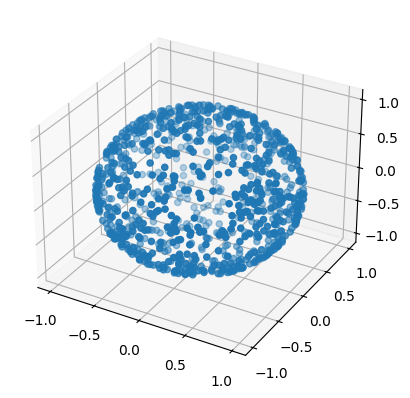

In [8]:
plot_points(sphere_points)

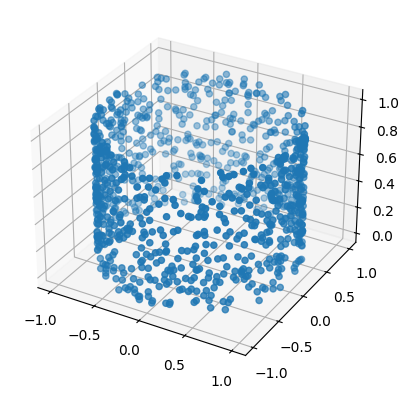

In [9]:
cilinder_points = sample_cilinder(1000, 1, 1)

plot_points(cilinder_points)

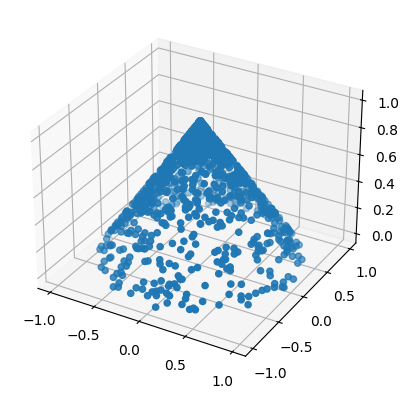

In [10]:
cone_points = sample_cone(1000, 1, 1)

plot_points(cone_points)

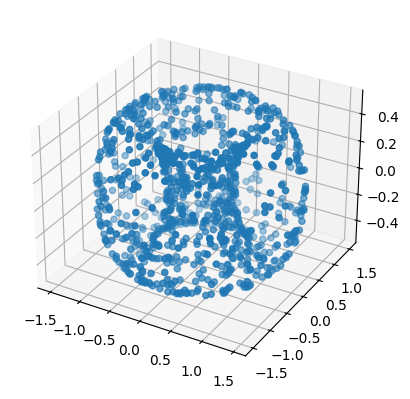

In [11]:
torus_points = sample_torus(1000, 1, 0.5)

plot_points(torus_points)

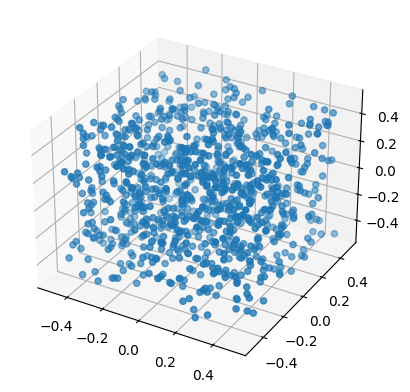

In [12]:
cube_points = sample_cuboid(1000, 1, 1, 1)

plot_points(cube_points)

In [29]:
import numpy as np


def sample_points_on_cylinder_uniformly(r, h, num_points):
    # Areas of the cylinder parts
    area_side = 2 * np.pi * r * h
    area_top = np.pi * r**2
    area_bottom = np.pi * r**2
    total_area = area_side + area_top + area_bottom

    # Probabilities for each part
    p_side = area_side / total_area
    p_top = area_top / total_area
    p_bottom = area_bottom / total_area

    # Choose which part to sample from for each point
    parts = np.random.choice(
        ["side", "top", "bottom"], size=num_points, p=[p_side, p_top, p_bottom]
    )

    points = np.zeros((num_points, 3))

    num_top = np.sum(parts == "top")
    num_bottom = np.sum(parts == "bottom")
    num_side = num_points - num_top - num_bottom

    # Sample top points uniformly in a circle
    R = np.sqrt(np.random.rand(num_top)) * r
    theta = np.random.rand(num_top) * 2 * np.pi
    top_points = np.stack(
        [R * np.cos(theta), R * np.sin(theta), np.ones(num_top) * h], axis=1
    )

    # Sample bottom points uniformly in a circle
    R = np.sqrt(np.random.rand(num_bottom)) * r
    theta = np.random.rand(num_bottom) * 2 * np.pi
    bottom_points = np.stack(
        [R * np.cos(theta), R * np.sin(theta), np.zeros(num_bottom)], axis=1
    )

    # Sample side points uniformly on the side
    u = np.random.rand(num_side) * 2 * np.pi
    v = np.random.rand(num_side) * h

    x = r * np.cos(u)
    y = r * np.sin(u)
    z = v

    side_points = np.stack([x, y, z], axis=1)

    points[parts == "top"] = top_points
    points[parts == "bottom"] = bottom_points
    points[parts == "side"] = side_points

    return points

In [30]:
points = sample_points_on_cylinder_uniformly(1, 2, 1000)

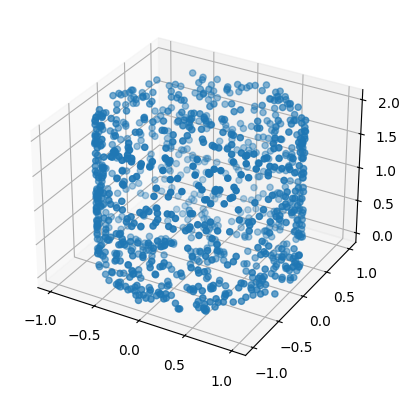

In [31]:
plot_points(points)

In [32]:
import numpy as np

def sample_cone(num_points, r, h):
    """
    Sample points on a cone surface.

    Args:
        num_points (int): The number of points to sample.
        r (float): The radius of the base of the cone.
        h (float): The height of the cone.

    Returns:
        numpy.ndarray: An array of shape (num_points, 3) containing the sampled points.
    """
    l = np.sqrt(r**2 + h**2)
    area_lateral = np.pi * r * l
    area_base = np.pi * r**2
    total_area = area_lateral + area_base

    p_lateral = area_lateral / total_area
    p_base = area_base / total_area

    parts = np.random.choice(["base", "lateral"], size=num_points, p=[p_base, p_lateral])

    points = np.zeros((num_points, 3))

    num_base = np.sum(parts == "base")
    num_lateral = np.sum(parts == "lateral")

    # Sample base points
    R = np.sqrt(np.random.rand(num_base)) * r
    theta = np.random.rand(num_base) * 2 * np.pi
    base_points = np.stack([R * np.cos(theta), R * np.sin(theta), np.zeros(num_base)], axis=1)

    # Sample lateral points
    s = np.random.rand(num_lateral) * area_lateral  # Uniform sampling by arc length
    theta = s / (r * l)
    v = np.random.rand(num_lateral)

    # Convert back to Cartesian coordinates on the cone surface
    x = (1 - v) * r * np.cos(theta * 2 * np.pi)
    y = (1 - v) * r * np.sin(theta * 2 * np.pi)
    z = v * h

    lateral_points = np.stack([x, y, z], axis=1)

    points[parts == "base"] = base_points
    points[parts == "lateral"] = lateral_points

    return points



points = sample_cone(1000, 1, 2)

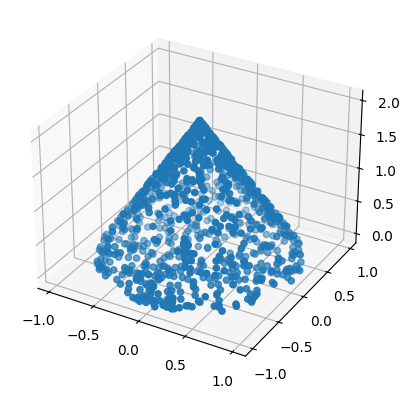

In [33]:
plot_points(points)